---
# 종목 선정 과정

- 상관성이 낮은 종목으로 구성
- 단기, 중기, 장기 상관성 비교
- 주식, 채권, 원자재, 금, 달러

<br>

- 장기투자 특성을 고려하여 모든 종목을 ETF로 담음

### 연도별 히트맵 & 상관관계

[*********************100%***********************]  14 of 14 completed


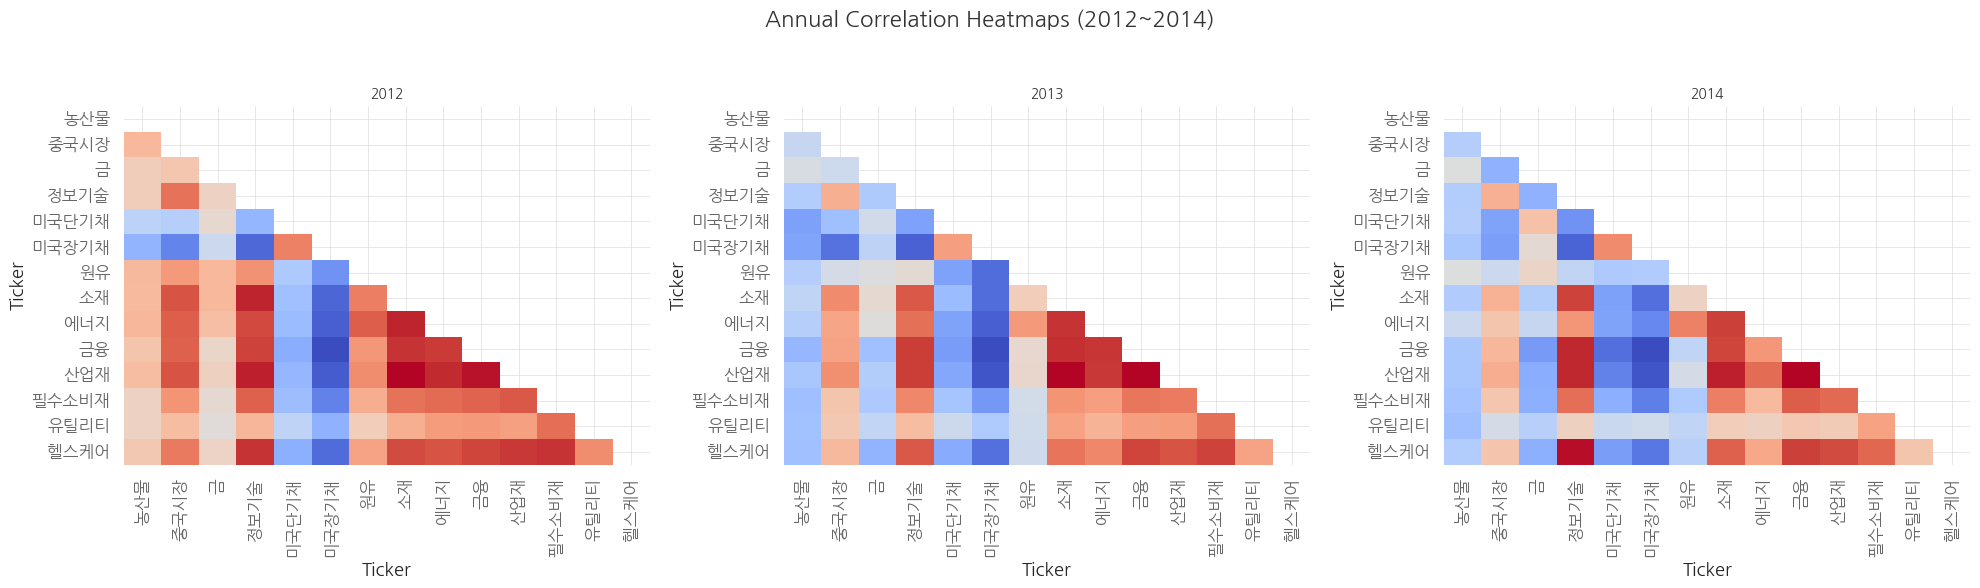

In [278]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 불러오기
data = pd.read_csv(f'/Users/leesangwon/Downloads/sector(assets).csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start="2012-01-01", end="2015-01-01")['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

# 로그 수익률 계산
log_returns = data.pct_change().apply(lambda x: np.log(1 + x))

# 연도별 상관분석 및 1x3 그리드 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1행 3열 그리드 생성
fig.suptitle("Annual Correlation Heatmaps (2012~2014)", fontsize=16)

plot_idx = 0  # 플롯 인덱스 초기화
for year in range(2012, 2015):  # 2012~2014년
    # 연도 데이터 필터링
    yearly_data = data[data.index.year == year]
    if yearly_data.empty:  # 데이터가 없는 경우 건너뜀
        print(f"No data for year {year}")
        continue

    # 로그 수익률 계산
    log_returns = yearly_data.pct_change().apply(lambda x: np.log(1 + x)).dropna()  # NaN 제거
    if log_returns.empty:  # 계산된 로그 수익률이 없는 경우 건너뜀
        print(f"No valid log returns for year {year}")
        continue

    # 상관관계 계산
    correlation_matrix = log_returns.corr()

    # 현재 플롯 좌표 계산
    ax = axes[plot_idx]
    plot_idx += 1

    # 상삼각형 마스킹
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # 히트맵 시각화
    sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', fmt=".2f", ax=ax, cbar=False)
    ax.set_title(f"{year}", fontsize=10)

# 남은 플롯 비활성화
for i in range(plot_idx, 3):  # 총 3개의 플롯이므로 남은 플롯 비활성화
    axes[i].axis("off")

# 전체 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 확보
plt.show()

In [281]:
# 상관계수 행렬에서 상관계수가 낮은 항목 추출
low_corr_pairs = []

# 상관계수 행렬 반복
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if np.abs(corr_value) <= 0.2:  # 절댓값 기준
            low_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

# 데이터프레임 생성 및 정렬
low_corr_assets_ticker = pd.DataFrame(low_corr_pairs, columns=['자산 1', '자산 2', '상관계수'])
low_corr_assets_ticker['상관계수'] = low_corr_assets_ticker['상관계수'].round(2)  # 소수점 2자리 반올림
low_corr_assets_ticker['절댓값'] = np.abs(low_corr_assets_ticker['상관계수'])  # 절댓값 추가
low_corr_df_sorted = low_corr_assets_ticker.sort_values(by='절댓값')  # 절댓값 기준 정렬
low_corr_df_sorted = low_corr_df_sorted.drop(columns=['절댓값'])  # 절댓값 칼럼 삭제

# 상관계수가 낮은 항목 출력
low_corr_df_sorted

,자산 1,자산 2,상관계수
26,미국단기채,유틸리티,-0.01
0,농산물,중국시장,0.02
22,금,유틸리티,-0.02
9,농산물,유틸리티,-0.02
4,농산물,소재,0.03
14,중국시장,원유,0.03
8,농산물,필수소비재,-0.03
31,원유,유틸리티,-0.04
32,원유,헬스케어,-0.04
2,농산물,미국단기채,-0.04


### 분기별 히트맵 & 상관관계

[*********************100%***********************]  14 of 14 completed


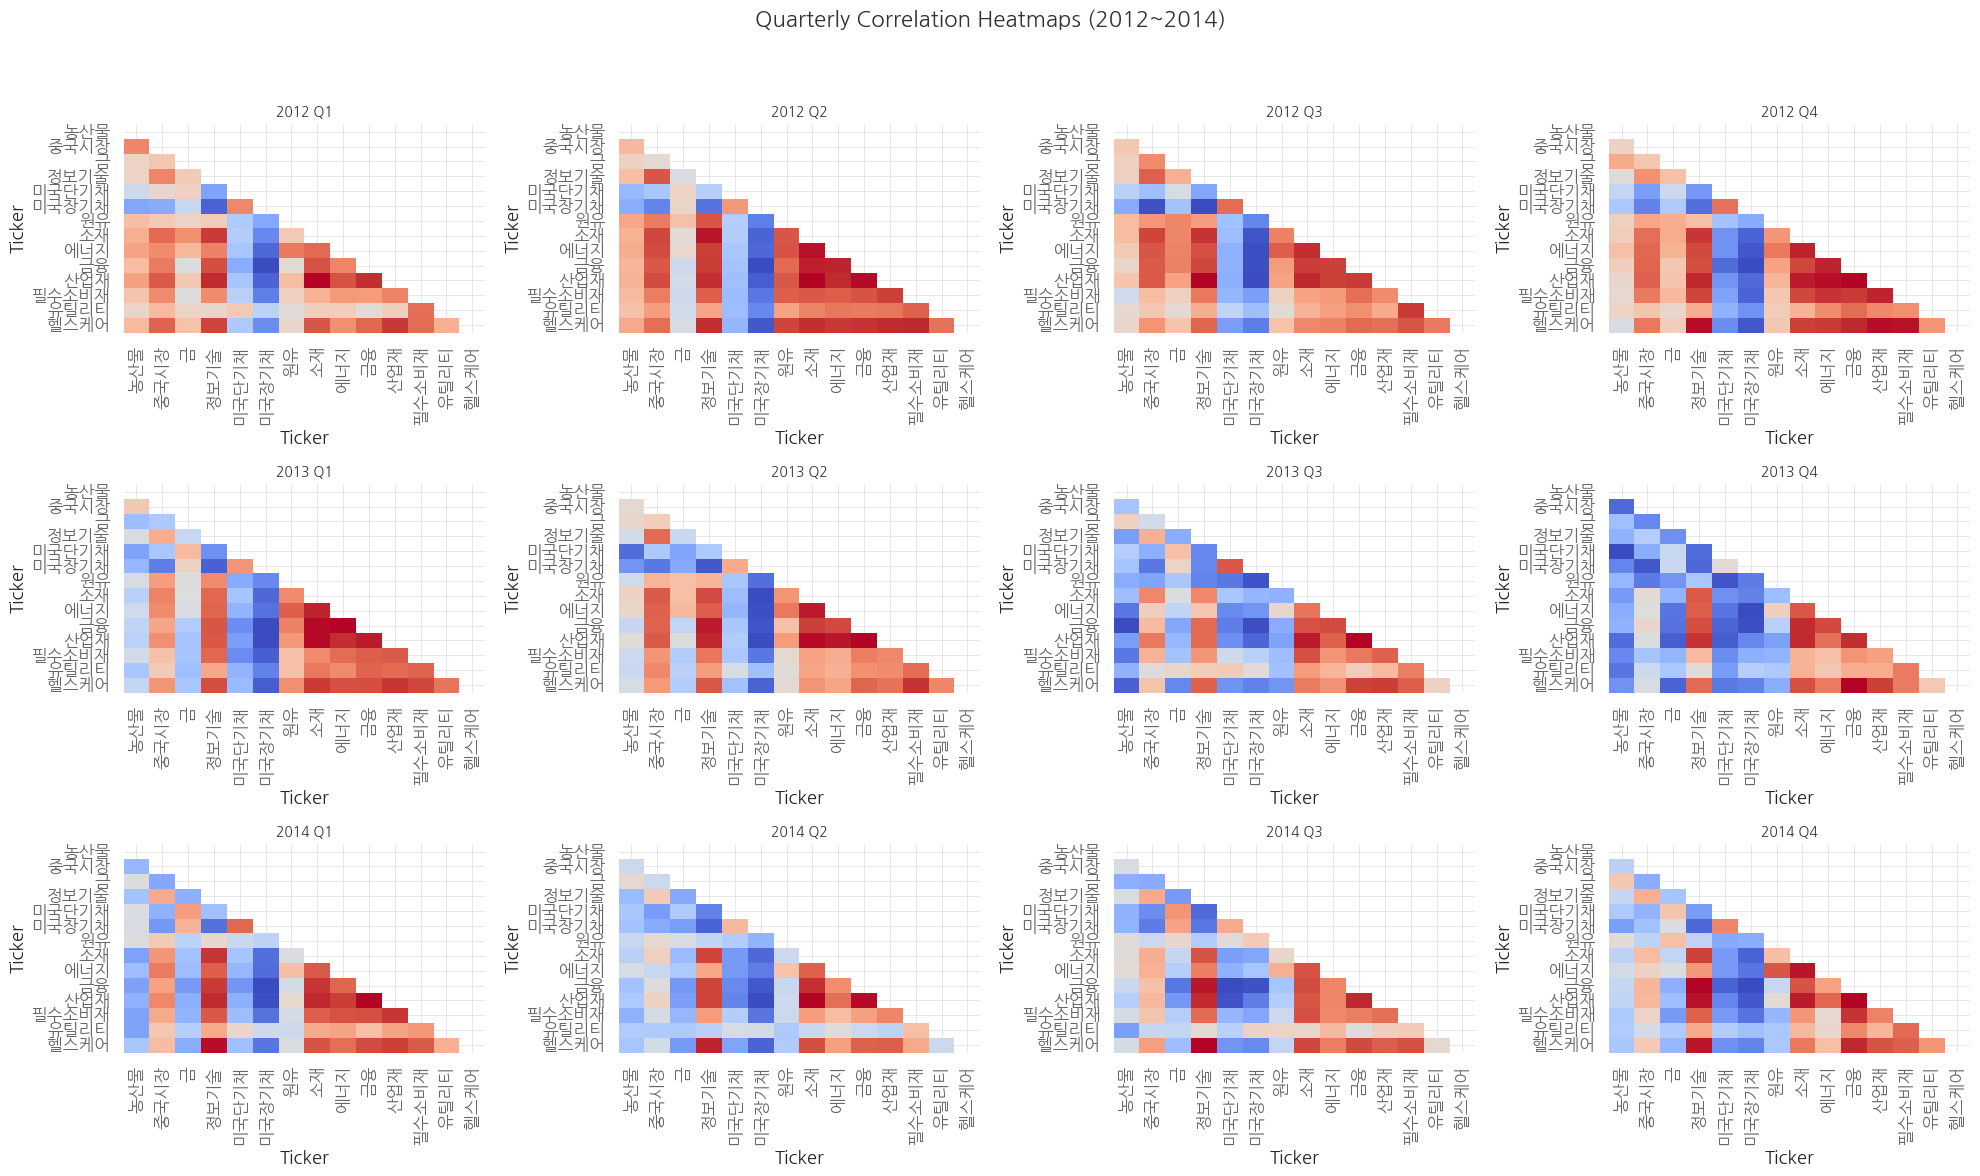

In [282]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 데이터 불러오기
data = pd.read_csv(f'/Users/leesangwon/Downloads/sector(assets).csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start="2012-01-01", end="2015-01-01")['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

# 로그 수익률 계산
log_returns = data.pct_change().apply(lambda x: np.log(1 + x))

# 분기별 상관분석 및 3x4 그리드 시각화
fig, axes = plt.subplots(3, 4, figsize=(20, 12))  # 3행 4열 그리드 생성
fig.suptitle("Quarterly Correlation Heatmaps (2012~2014)", fontsize=16)

plot_idx = 0  # 플롯 인덱스 초기화
for year in range(2012, 2015):
    for quarter in range(1, 5):  # 1~4분기
        # 분기 데이터 필터링
        quarterly_data = data[(data.index.year == year) & (data.index.quarter == quarter)]
        if quarterly_data.empty:  # 데이터가 없는 경우 건너뜀
            continue

        log_returns = quarterly_data.pct_change().apply(lambda x: np.log(1 + x))  # 로그 수익률 계산
        correlation_matrix = log_returns.corr()  # 상관관계 계산
        
        # 현재 플롯 좌표 계산
        row, col = divmod(plot_idx, 4)  # 4열 기준으로 행과 열 결정
        ax = axes[row, col]
        plot_idx += 1

        # 상삼각형 마스킹
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        
        # 히트맵 시각화
        sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', fmt=".2f", ax=ax, cbar=False)
        ax.set_title(f"{year} Q{quarter}", fontsize=10)

# 나머지 빈 플롯 비활성화
for i in range(plot_idx, 12):  # 총 12개의 플롯이므로 남은 플롯 비활성화
    row, col = divmod(i, 4)
    axes[row, col].axis("off")

# 전체 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])  # 제목 공간 확보
plt.show()

In [283]:
# 상관계수 행렬에서 상관계수가 낮은 항목 추출
low_corr_pairs = []

# 상관계수 행렬 반복
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if np.abs(corr_value) <= 0.2:  # 절댓값 기준
            low_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

# 데이터프레임 생성 및 정렬
low_corr_assets_ticker = pd.DataFrame(low_corr_pairs, columns=['자산 1', '자산 2', '상관계수'])
low_corr_assets_ticker['상관계수'] = low_corr_assets_ticker['상관계수'].round(2)  # 소수점 2자리 반올림
low_corr_assets_ticker['절댓값'] = np.abs(low_corr_assets_ticker['상관계수'])  # 절댓값 추가
low_corr_df_sorted = low_corr_assets_ticker.sort_values(by='절댓값')  # 절댓값 기준 정렬
low_corr_df_sorted = low_corr_df_sorted.drop(columns=['절댓값'])  # 절댓값 칼럼 삭제

# 상관계수가 낮은 항목 출력
low_corr_df_sorted

,자산 1,자산 2,상관계수
26,미국단기채,유틸리티,-0.01
0,농산물,중국시장,0.02
22,금,유틸리티,-0.02
9,농산물,유틸리티,-0.02
4,농산물,소재,0.03
14,중국시장,원유,0.03
8,농산물,필수소비재,-0.03
31,원유,유틸리티,-0.04
32,원유,헬스케어,-0.04
2,농산물,미국단기채,-0.04


---
# 투자 백테스트

벤치마크1) 레이달리오 사계절 포트폴리오
- 위험자산 30%
- 중기채 15%
- 장기채 40%
- 금 5.5%
- 상품 7.5%

벤치마크2) 영구 포트폴리오
- 주식 25%
- 채권 25%
- 금 25%
- 원자재 25%

In [284]:
import bt
import quantstats as qs
import pandas as pd
import yfinance as yf
import numpy as np

import koreanize_matplotlib

### 백테스팅 기간 설정

In [302]:
start = '2015-01-01'
end = '2024-11-01'

### 나의 전략 구성

#### 최초 전략

[*********************100%***********************]  14 of 14 completed


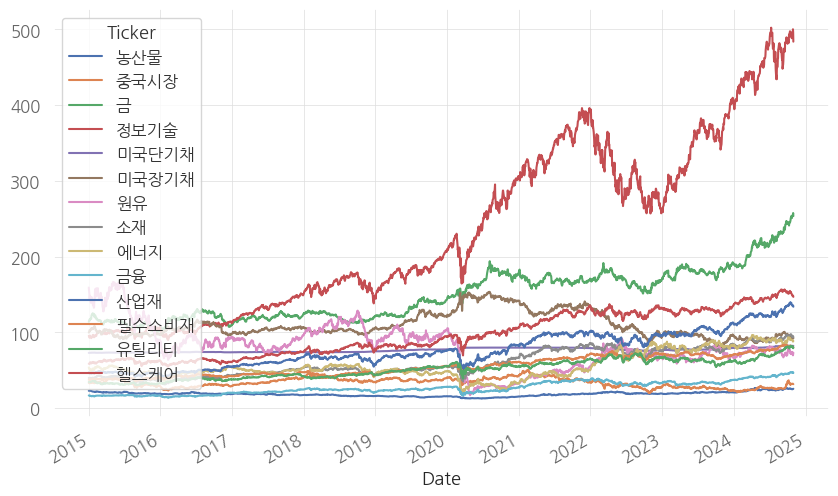

In [307]:
# 데이터 불러오기
data = pd.read_csv(f'/Users/leesangwon/Downloads/sector(assets).csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

data.plot()

s = bt.Strategy('최초_전략',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                #  bt.algos.WeighEqually(),
                 bt.algos.WeighSpecified(**{
                     '정보기술': 0.15,
                     '금융': 0.04,
                     '헬스케어': 0.04,
                     '산업재': 0.04,
                     '필수소비재': 0.04,
                     '에너지': 0.04,
                     '소재': 0.04,
                     '유틸리티': 0.04,
                     '중국시장': 0.15,
                     '미국장기채': 0.14,
                     '미국단기채': 0.14,
                     '금': 0.07,
                     '원유': 0.04,
                     '농산물': 0.03
                     }),            
                 bt.algos.Rebalance()
                 ])

bt1 = bt.Backtest(s, data, initial_capital=10000000)

#### 개별종목 포트폴리오

[*********************100%***********************]  14 of 14 completed


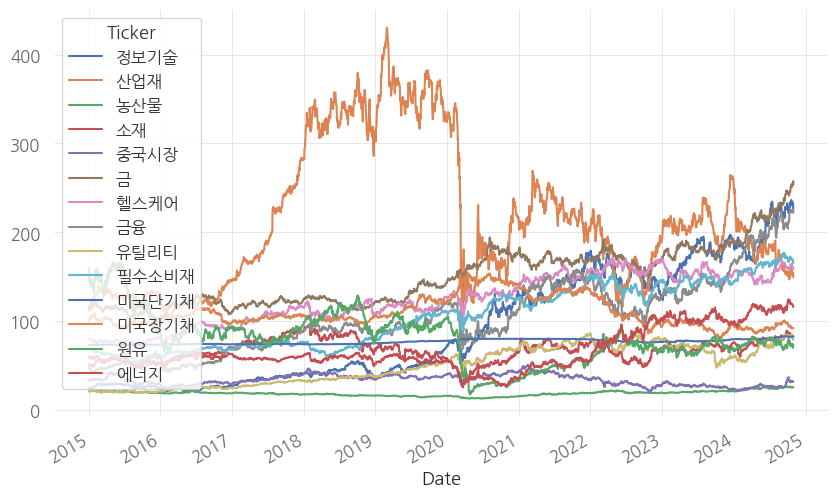

In [289]:
# 데이터 불러오기
data = pd.read_csv(f'/Users/leesangwon/Downloads/sector(assets)_개별.csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

data.plot()

s = bt.Strategy('개별_최대샤프_전략',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                #  bt.algos.WeighEqually(),
                 bt.algos.WeighSpecified(**{
                     '정보기술': 0.246,
                     '금융': 0.027,
                     '헬스케어': 0.006,
                     '산업재': 0.120,
                     '필수소비재': 0.020,
                     '에너지': 0.065,
                     '소재': 0.008,
                     '유틸리티': 0.017,
                     '중국시장': 0.281,
                     '미국장기채': 0.095,
                     '미국단기채': 0.023,
                     '금': 0.069,
                     '원유': 0.003,
                     '농산물': 0.020
                     }),            
                 bt.algos.Rebalance()
                 ])

bt2 = bt.Backtest(s, data, initial_capital=10000000)

#### 영구포트폴리오 최대샤프 전략

[*********************100%***********************]  4 of 4 completed


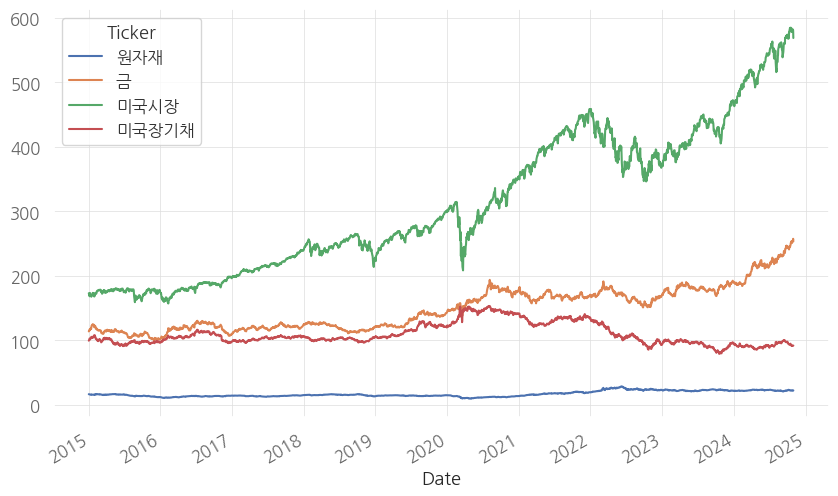

In [304]:
# 데이터 불러오기
data = pd.read_csv(f'/Users/leesangwon/Downloads/sector(assets)_영구최적화용.csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

data.plot()

s = bt.Strategy('영구_최대샤프_전략',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                #  bt.algos.WeighEqually(),
                 bt.algos.WeighSpecified(**{
                     '미국시장': 0.006,
                     '미국장기채': 0.012,
                     '금': 0.434,
                     '원자재': 0.548,
                     }),            
                 bt.algos.Rebalance()
                 ])

bt3 = bt.Backtest(s, data, initial_capital=10000000)

### 벤치마크

#### SPY

In [310]:
# 벤치마크 데이터 불러오기
df = pd.read_csv(f'/Users/leesangwon/Downloads/벤치마크종목.csv', encoding="utf-8")
tickers = df['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(df['티커'], df['섹터(자산군)']))

# 데이터 다운로드
df = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
df.rename(columns=ticker_to_name, inplace=True)
# df.plot()

# 벤치마크 - 미국시장
def buy_and_hold(df, name='buy_and_hold') :
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, df, initial_capital=10000000)



SPY = buy_and_hold(df['미국시장'].to_frame(), name='SPY')

[*********************100%***********************]  5 of 5 completed


#### All weaether

In [ ]:
# 벤치마크 데이터 불러오기
df = pd.read_csv(f'/Users/leesangwon/Downloads/벤치마크종목.csv', encoding="utf-8")
tickers = df['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(df['티커'], df['섹터(자산군)']))

# 데이터 다운로드
df = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
df.rename(columns=ticker_to_name, inplace=True)
# df.plot()

# 벤치마크 - 올웨더
all_weather = bt.Strategy('all_weather',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**{
                     '미국시장': 0.30,
                     '미국장기채': 0.40,
                     '미국단기채': 0.15,
                     '금': 0.055,
                     '원자재': 0.075
                     }),            
                 bt.algos.Rebalance()
                 ])

all_weather = bt.Backtest(all_weather, df, initial_capital=10000000)

[*********************100%***********************]  5 of 5 completed


#### Permanant

In [301]:
# 벤치마크 데이터 불러오기
df = pd.read_csv(f'/Users/leesangwon/Downloads/벤치마크종목.csv', encoding="utf-8")
tickers = df['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(df['티커'], df['섹터(자산군)']))

# 데이터 다운로드
df = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
df.rename(columns=ticker_to_name, inplace=True)
# df.plot()

# 벤치마크 - 영구포트폴리오
permanant = bt.Strategy('permanant',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**{
                     '미국시장': 0.25,
                     '미국장기채': 0.25,
                     '금': 0.25,
                     '원자재': 0.25
                     }),            
                 bt.algos.Rebalance()
                 ])

permanant = bt.Backtest(permanant, df, initial_capital=10000000)

[*********************100%***********************]  5 of 5 completed


### 전략 실행

In [308]:
res = bt.run(SPY, all_weather, permanant, bt1, bt2, bt3)

100%|██████████| 6/6 [00:00<00:00, 24.88it/s]


### 결과 분석

<Axes: title={'center': 'Equity Progression'}>

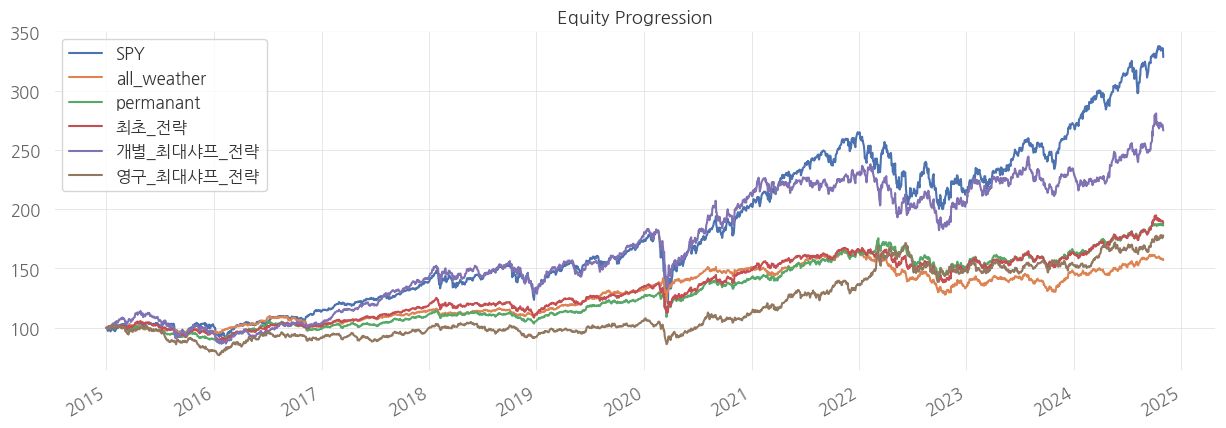

In [309]:
res.plot()

In [270]:
res.display()

Stat                 SPY         all_weather    permanant    Sangwon     개별_최대샤프_전략    영구_최대샤프_전략
-------------------  ----------  -------------  -----------  ----------  --------------------  --------------------
Start                2015-01-01  2015-01-01     2015-01-01   2015-01-01  2015-01-01            2015-01-01
End                  2024-10-30  2024-10-30     2024-10-30   2024-10-30  2024-10-30            2024-10-30
Risk-free rate       0.00%       0.00%          0.00%        0.00%       0.00%                 0.00%

Total Return         234.93%     58.17%         87.85%       89.69%      168.84%               77.96%
Daily Sharpe         0.79        0.60           0.74         0.67        0.69                  0.52
Daily Sortino        1.21        0.96           1.19         1.05        1.11                  0.83
CAGR                 13.09%      4.78%          6.62%        6.73%       10.59%                6.04%
Max Drawdown         -33.72%     -22.82%        -18.42%      -18.20% 

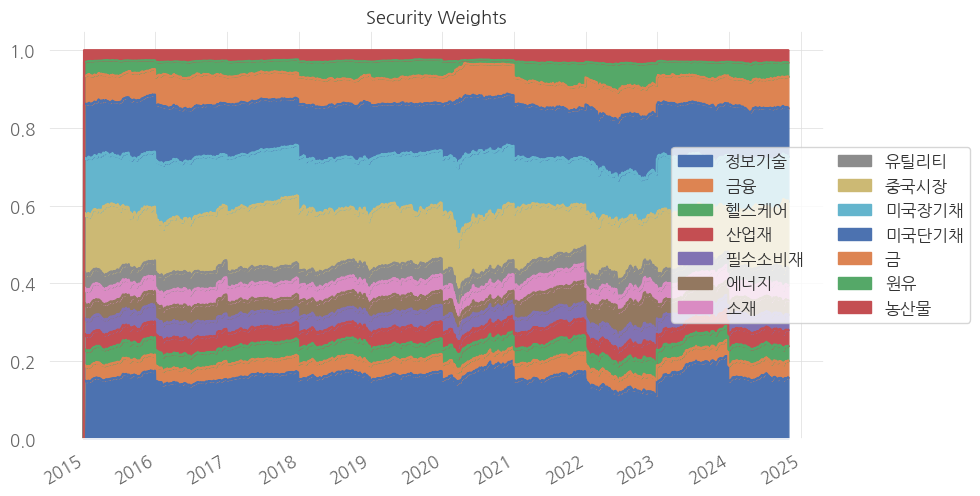

In [271]:
res.backtests['Sangwon'].security_weights.plot.area()
plt.title("Security Weights")
plt.legend(ncol =2, loc = 'right', bbox_to_anchor = (1.2,0.5))

                           Strategy
-------------------------  ----------
Start Period               2010-01-04
End Period                 2024-10-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          188.97%
CAGR﹪                     5.06%

Sharpe                     0.75
Prob. Sharpe Ratio         99.78%
Smart Sharpe               0.71
Sortino                    1.05
Smart Sortino              1.0
Sortino/√2                 0.75
Smart Sortino/√2           0.71
Omega                      1.14

Max Drawdown               -18.2%
Longest DD Days            778
Volatility (ann.)          10.25%
Calmar                     0.28
Skew                       -0.48
Kurtosis                   5.75

Expected Daily %           0.03%
Expected Monthly %         0.6%
Expected Yearly %          7.33%
Kelly Criterion            6.75%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.03%
Expected Shortfall (cVaR)  -1.03%

Max Consecutive Wins       1

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-02-20,2020-03-18,2020-07-17,149,-18.204626,-17.743484
2,2022-01-13,2022-10-14,2024-02-29,778,-17.404571,-16.718227
3,2015-04-28,2016-01-20,2017-02-14,659,-15.823772,-14.957629
4,2018-01-29,2018-12-24,2019-06-19,507,-13.371898,-11.372774
5,2011-05-02,2011-10-03,2011-11-07,190,-9.120491,-8.732401


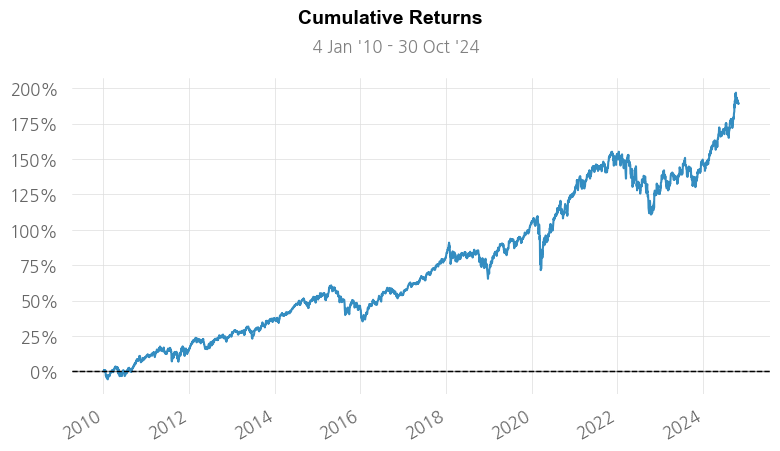

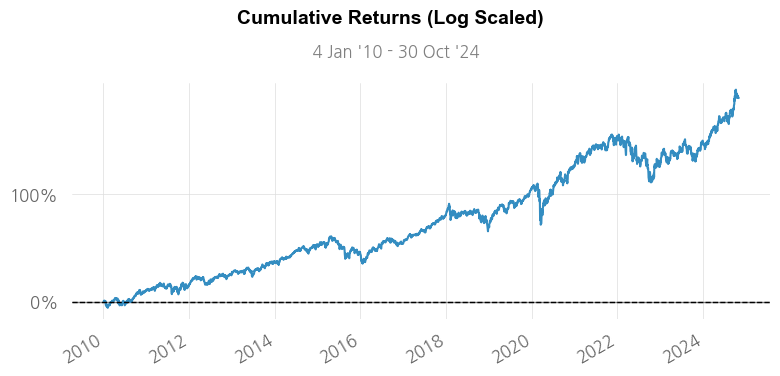

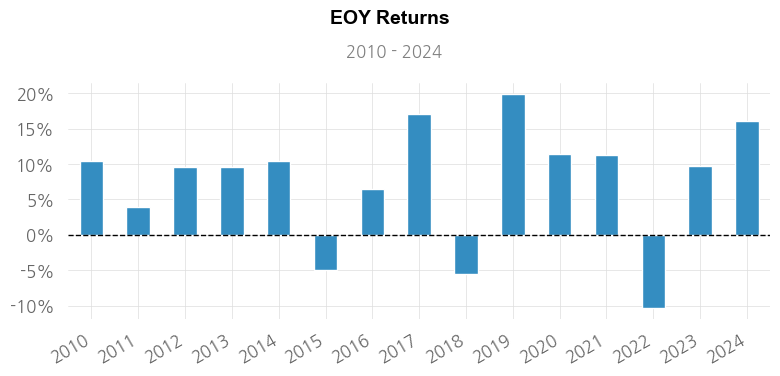

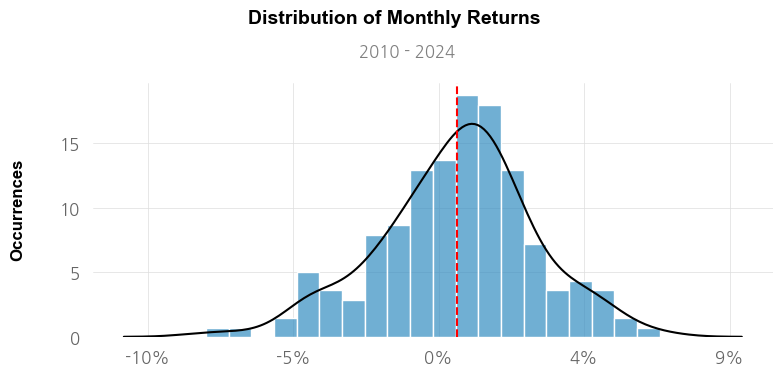

/opt/anaconda3/lib/python3.12/site-packages/quantstats/_plotting/core.py:294: FutureWarning: Passing additional kwargs to DatetimeIndexResampler.sum has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  returns = returns.last() if compound is True else returns.sum(axis=0)


UnsupportedFunctionCall: numpy operations are not valid with resample. Use .resample(...).sum() instead

In [185]:
import quantstats as qs
qs.reports.full(res.prices['Sangwon'].to_returns().dropna()),
res.prices['Sangwon'].to_returns().dropna()